# 梯度下降法模拟

In [1]:
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
plot_x = np.linspace(-1,6,141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y = (plot_x - 2.5)**2 - 1

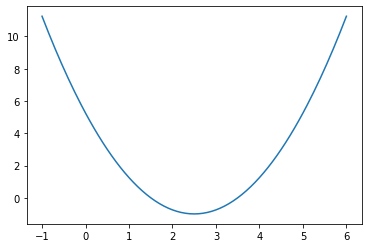

In [4]:
plt.plot(plot_x,plot_y)

In [5]:
def dJ(theta):
    return  2*(theta-2.5)

In [6]:
def J(theta):
    return (theta - 2.5)**2 - 1 

In [7]:
eta = 0.1
epsilon = 1e-8
theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta *gradient
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


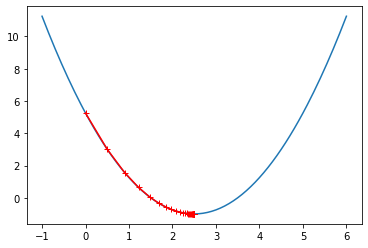

In [8]:
eta = 0.1
epsilon = 1e-8
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta *gradient
    theta_history.append(theta)
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
plt.plot(plot_x,plot_y)    
plt.plot(np.array(theta_history),J(np.array(theta_history)),
                                    color= 'r',marker="+")


In [9]:
def gradient_descent(initial_theta,eta,epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta *gradient
        theta_history.append(theta)
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),
            color='r',marker = '+')

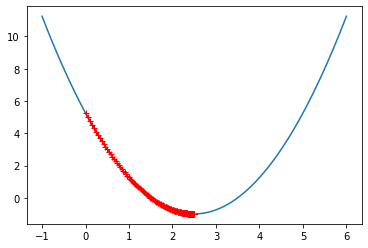

In [10]:
eta = 0.01
theta_history=[]
gradient_descent(0.,eta)
plot_theta_history()

In [11]:
len(theta_history)

424

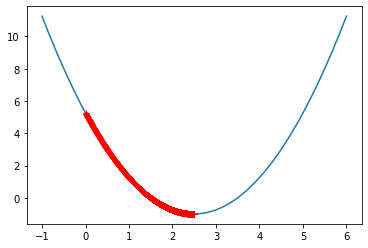

In [12]:
eta = 0.001
theta_history=[]
gradient_descent(0.,eta)
plot_theta_history()

In [13]:
len(theta_history)

3682

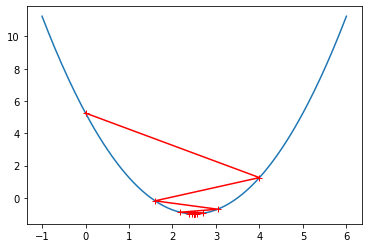

In [14]:
eta = 0.8
theta_history=[]
gradient_descent(0.,eta)
plot_theta_history()

In [15]:
def gradient_descent(initial_theta,eta,n_iters = 1e4,epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta *gradient
        theta_history.append(theta)
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter +=1
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),
            color='r',marker = '+')

In [16]:
eta =0.1
theta_history = []
gradient_descent(0,eta)

In [17]:
len(theta_history)

46

# 线性回归模型中使用梯度下降法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed = 666
X =2 *np.random.random(size=100)
y = X*3.+4.+np.random.normal(size=100)

In [4]:
X=X.reshape(-1,1)

In [6]:
X.shape

(100, 1)

In [7]:
y.shape

(100,)

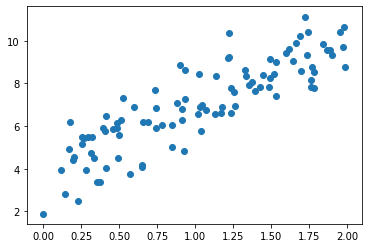

In [9]:
plt.scatter(X,y)

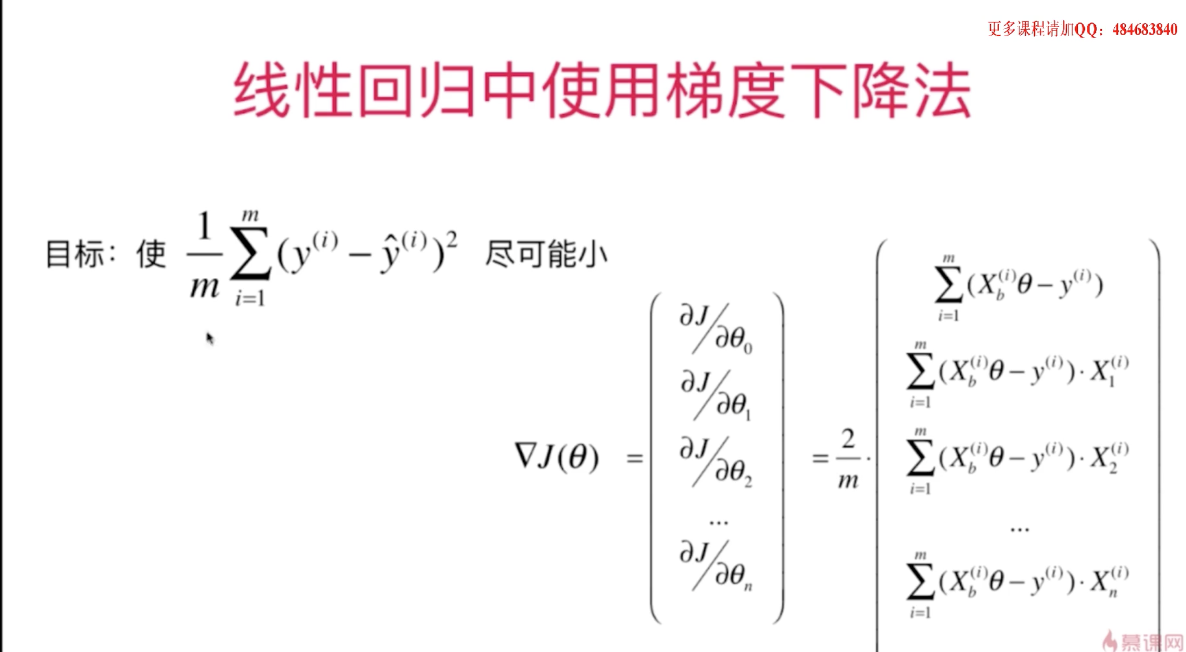# 


In [15]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [16]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [17]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [18]:
X_b = np.hstack([np.ones((len(X), 1)), X.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [19]:
theta

array([3.84531539, 3.11831617])

### 封装我们自己的线性回归算法

In [21]:
from KNN.LinaerRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [22]:
lin_reg.coef_

array([3.11831617])

In [23]:
lin_reg.intercept_

3.8453153921002863

# 梯度下降法的向量化

In [24]:
import numpy as np
from sklearn import datasets

In [25]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X [y<50.0]
y = y [y<50.0]

In [26]:
from KNN.model_selection import train_test_spilt
X_train,X_test,y_train,y_test = train_test_spilt(X,y)

In [27]:
from KNN.LinaerRegression import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit_normal(X_train,y_train)
lin_reg.score(X_test,y_test)

CPU times: user 3.72 ms, sys: 2.15 ms, total: 5.87 ms
Wall time: 5.44 ms


0.7257167729549615

## 使用梯度下降法

In [28]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train,y_train)

/Users/Elroy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Elroy/Desktop/machine-learning/KNN/LinaerRegression.py:37: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
/Users/Elroy/Desktop/machine-learning/KNN/LinaerRegression.py:53: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
/Users/Elroy/Desktop/machine-learning/KNN/LinaerRegression.py:42: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)


LinearRegression()

In [29]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [30]:
X_train[:10,:]

array([[3.47428e+00, 0.00000e+00, 1.81000e+01, 1.00000e+00, 7.18000e-01,
        8.78000e+00, 8.29000e+01, 1.90470e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.54550e+02, 5.29000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01],
       [4.66600e-02, 8.00000e+01, 1.52000e+00, 0.00000e+00, 4.04000e-01,
        7.10700e+00, 3.66000e+01, 7.30900e+00, 2.00000e+00, 3.29000e+02,
        1.26000e+01, 3.54310e+02, 8.61000e+00],
       [1.50980e-01, 0.00000e+00, 1.00100e+01, 0.00000e+00, 5.47000e-01,
        6.02100e+00, 8.26000e+01, 2.74740e+00, 6.00000e+00, 4.32000e+02,
        1.78000e+01, 3.94510e+02, 1.03000e+01],
       [2.11610e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.20000e-01,
        6.13700e+00, 8.74000e+01, 2.71470e+00, 5.00000e+00, 3.84000e+02,
        2.09000e+01, 3.94470e+02, 1.34400e+01],
       [8.30800e-02, 0.00000e+

In [31]:
lin_reg2.fit_gd(X_train,y_train,eta = 0.000001)


LinearRegression()

In [32]:
lin_reg2.score(X_test,y_test)

0.26166402808292577

In [33]:
%time lin_reg2.fit_gd(X_train,y_train,eta = 0.000001,n_iters=1e6)

CPU times: user 1min 48s, sys: 1.04 s, total: 1min 49s
Wall time: 58.5 s


LinearRegression()

In [34]:
lin_reg2.score(X_test,y_test)

0.6438767931357487

## 使用梯度下降法前进行数据归一化

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
standardScalar = StandardScaler()
standardScalar.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
X_train_standard = standardScalar.transform(X_train)

In [38]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard,y_train)

CPU times: user 503 ms, sys: 8.56 ms, total: 512 ms
Wall time: 276 ms


LinearRegression()

In [39]:
X_test_standard = standardScalar.transform(X_test)

In [40]:
lin_reg3.score(X_test_standard,y_test)

0.7256741168150449

## 梯度下降算法的优势

In [41]:
m = 1000
n = 5000

big_X= np.random.normal(size = (m,n))

ture_theta = np.random.uniform(0.0,100.0,size=n+1)
big_y = big_X.dot(ture_theta[1:])+ture_theta[0]+np.random.normal(0.,10.,size=m)

In [42]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X,big_y)

CPU times: user 13.9 s, sys: 371 ms, total: 14.3 s
Wall time: 7.16 s


LinearRegression()

In [43]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X,big_y)

CPU times: user 7.93 s, sys: 31.6 ms, total: 7.96 s
Wall time: 4.06 s


LinearRegression()

# 随机梯度下降法

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
m=100000

X= np.random.normal(size=m)
X = X.reshape(-1,1)
y = 4.*X + 3. +np.random.normal(0,3.)

In [46]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) *2. / len(y)
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [ ]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [ ]:
theta

## 随机梯度下降法

In [ ]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) *2

In [ ]:
def sgd(X_b,y,initial_theta,n_iters):
    t0 = 5
    t1 = 50
    def learning_rate(t):
        return t0/(t+t1)
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJsgd(theta,X_b[rand_i],y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    
    return theta
        

In [ ]:
 
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b,y,initial_theta,n_iters=len(X_b)//3)